- Understand and Cleaning the data

In [1]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading of data set
df = pd.read_csv('/workspaces/Hotel-Management/data/raw/hotels_data.csv')
df.head()


,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars
0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3
1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3
2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5
3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4
4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4


In [3]:
# Understand the data

df.shape

(187848, 10)

In [4]:
df.columns

Index(['Snapshot ID', 'Snapshot Date', 'Checkin Date', 'Days',
       'Original Price', 'Discount Price', 'Discount Code', 'Available Rooms',
       'Hotel Name', 'Hotel Stars'],
      dtype='object')

In [5]:
df.isnull().sum()

Snapshot ID        0
Snapshot Date      0
Checkin Date       0
Days               0
Original Price     0
Discount Price     0
Discount Code      0
Available Rooms    0
Hotel Name         0
Hotel Stars        0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(19)

In [7]:
# Remove 19 duplicated values

df = df.drop_duplicates()
df.shape

(187829, 10)

In [8]:
# Checking the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187829 entries, 0 to 187847
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Snapshot ID      187829 non-null  int64 
 1   Snapshot Date    187829 non-null  object
 2   Checkin Date     187829 non-null  object
 3   Days             187829 non-null  int64 
 4   Original Price   187829 non-null  int64 
 5   Discount Price   187829 non-null  int64 
 6   Discount Code    187829 non-null  int64 
 7   Available Rooms  187829 non-null  int64 
 8   Hotel Name       187829 non-null  object
 9   Hotel Stars      187829 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 15.8+ MB


In [9]:
df['Snapshot Date'] = pd.to_datetime(df['Snapshot Date'], errors = 'coerce')
df['Checkin Date'] = pd.to_datetime(df['Checkin Date'], errors = 'coerce')

- Visualization and EDA

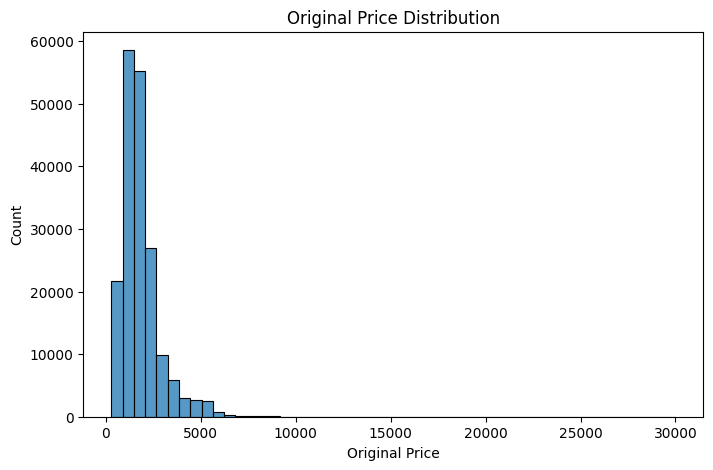

In [10]:
# We can see the price distribution of cheap hotel vs Expensive hotel
plt.figure(figsize = (8,5))
sns.histplot(df['Original Price'], bins = 50)
plt.title("Original Price Distribution")
plt.show()
# Right skewed distribution- commom hotel pricing

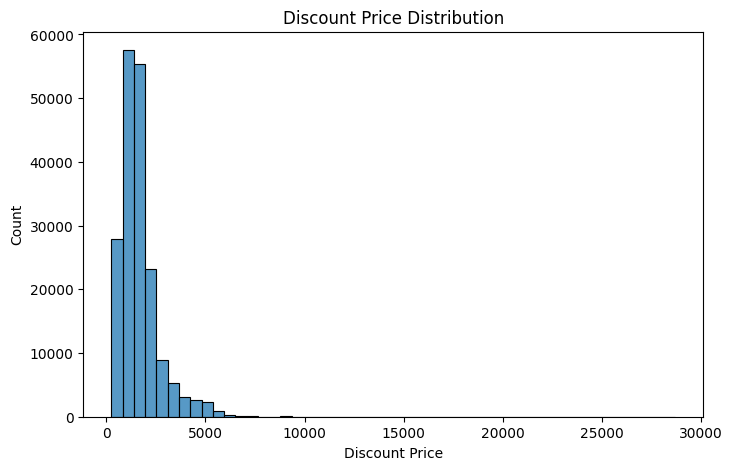

In [11]:
# To understand how many hotels offer low vs high doscount price
plt.figure(figsize = (8,5))
sns.histplot(df['Discount Price'], bins = 50)
plt.title("Discount Price Distribution")
plt.show()
# High end hotel gives a less discounts

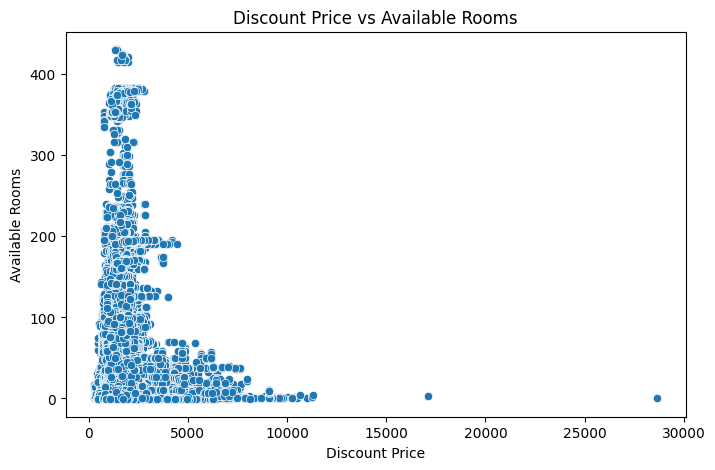

In [12]:
# Price vs Available Rooms
plt.figure(figsize = (8,5))
sns.scatterplot(x=df['Discount Price'], y=df['Available Rooms'])
plt.title("Discount Price vs Available Rooms")
plt.show()
# Data scattered it Means price alone does not decide occupancy.

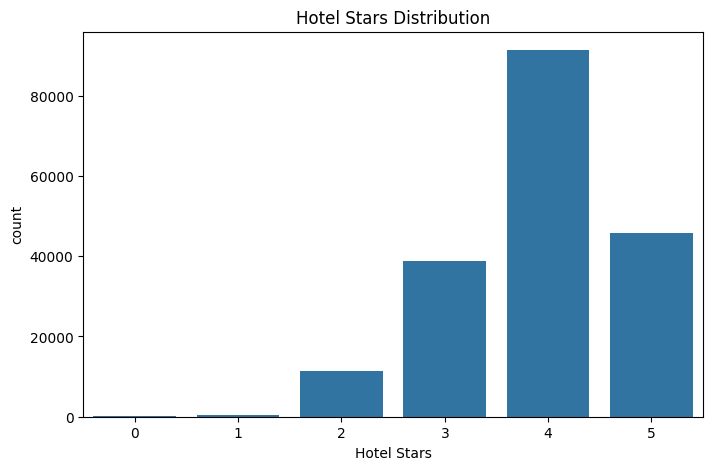

In [13]:
# check the Countplot of Hotel Stars
plt.figure(figsize=(8,5))
sns.countplot(x=df['Hotel Stars'])
plt.title("Hotel Stars Distribution")
plt.show()
# 4 star hotel is higher than 1,2,3,5 stars hotels

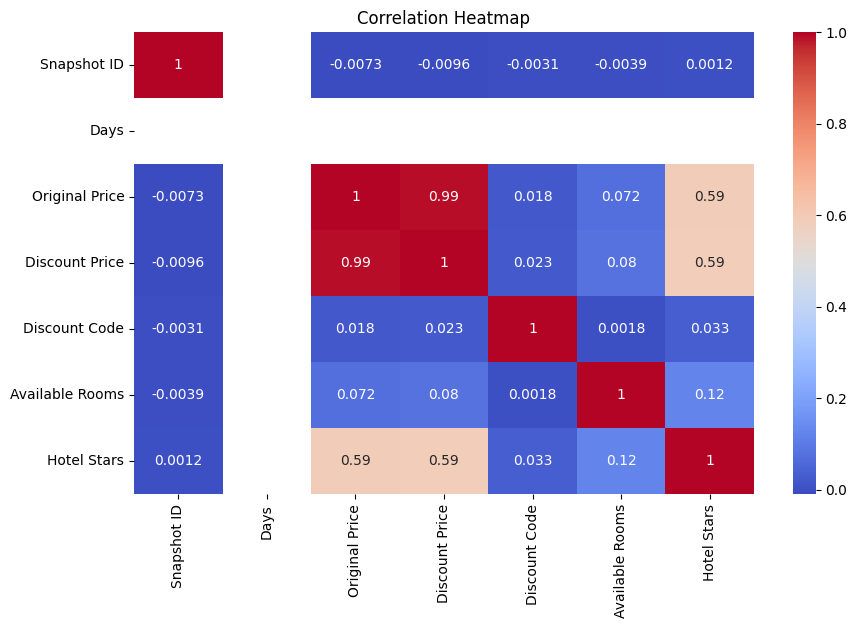

In [14]:
# understanding the correlation
plt.figure(figsize=(10,6))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Hotel Stars and Prices are strongly correlated, meaning higher-star hotels generally have higher prices.
# Discount and Available Rooms have very weak correlation, so discount alone does not guarantee more bookings.

- Feature Engineering

In [15]:
# make new features and check whether they are added properly or not

df['discount_pct'] = (df['Original Price'] - df['Discount Price']) / df['Original Price']
df['price_per_night'] = df['Discount Price'] / df['Days']
df['days_to_checkin'] = (df['Checkin Date'] - df['Snapshot Date']).dt.days
df['checkin_month'] = df['Checkin Date'].dt.month
df['checkin_weekday'] = df['Checkin Date'].dt.day_name()


In [16]:
df.head()

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,discount_pct,price_per_night,days_to_checkin,checkin_month,checkin_weekday
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,0.117148,208.0,26,8,Wednesday
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,0.117700,196.4,33,8,Wednesday
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,0.029748,848.0,27,8,Thursday
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,0.041403,333.4,9,7,Sunday
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,0.038528,334.4,26,8,Wednesday


- Encoding and Prepare ML dataset

In [17]:
# Label Encoding Categorical columns
# Model become a confused, we need to convert the string into the numbers
from sklearn.preprocessing import LabelEncoder

le_hotel = LabelEncoder()
le_weekday = LabelEncoder()
le_discount = LabelEncoder()

df['hotel_encoded'] = le_hotel.fit_transform(df['Hotel Name'])
df['weekday_encoded'] = le_weekday.fit_transform(df['checkin_weekday'])
df['discount_encoded'] = le_discount.fit_transform(df['Discount Code'])


In [18]:
# Select numeric and encoded features that will be used as model inputs (X)
X = df[['discount_pct', 'price_per_night', 'days_to_checkin',
        'checkin_month', 'hotel_encoded', 'weekday_encoded', 'discount_encoded']]


In [ ]:
# Select the target variable y that we want the model to predict (Available Rooms)
y = df['Available Rooms']

In [20]:
# Split the dataset into training and testing sets (80% train, 20% test) for model evaluation.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
X_train.shape, X_test.shape

((150263, 7), (37566, 7))

In [22]:
y_train.shape, y_test.shape

((150263,), (37566,))

- Model Training

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Train RandomForest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", sqrt(mean_squared_error(y_test, y_pred)))

print("\nFeature Importances:")
print(pd.Series(rf.feature_importances_, index=X.columns))


R2: 0.9456378561980721
RMSE: 9.854745357431273

Feature Importances:
discount_pct        0.021347
price_per_night     0.062315
days_to_checkin     0.042476
checkin_month       0.042773
hotel_encoded       0.813427
weekday_encoded     0.012532
discount_encoded    0.005130
dtype: float64


- Clustering

The clustering helps us understand which hotels are similar so we can give better discount advice to each group.

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# selecting features for clustering
clust_features = df[['price_per_night', 'discount_pct', 'Hotel Stars']]

# scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clust_features)

# applying k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# see how many hotels in each cluster
df['cluster'].value_counts()


cluster
2    105090
0     46065
1     36674
Name: count, dtype: int64

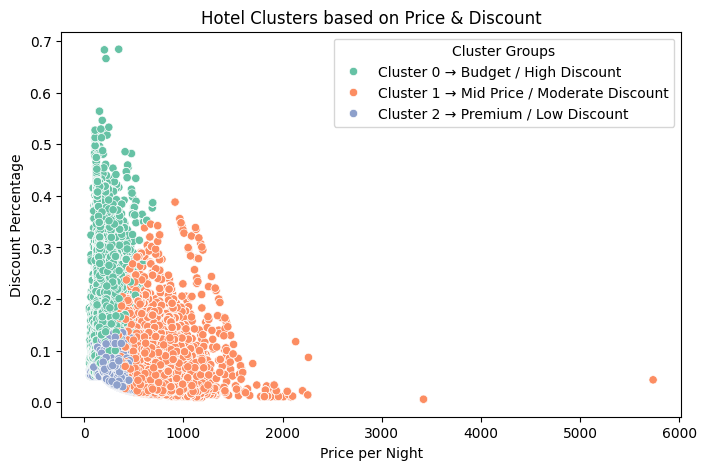

In [ ]:
# To give simple names to the cluster numbers.
cluster_mapping = {
    0: "Cluster 0 → Budget / High Discount",
    1: "Cluster 1 → Mid Price / Moderate Discount",
    2: "Cluster 2 → Premium / Low Discount"
}

# This creates the cluster scatter plot using the new readable labels.

df['cluster_label'] = df['cluster'].map(cluster_mapping)
plt.figure(figsize=(8,5))
sns.scatterplot(
    x=df['price_per_night'],
    y=df['discount_pct'],
    hue=df['cluster_label'],
    palette='Set2'
)
plt.title("Hotel Clusters based on Price & Discount")
plt.xlabel("Price per Night")
plt.ylabel("Discount Percentage")
plt.legend(title="Cluster Groups")
plt.show()


# Conclusion

The analysis of hotel pricing and discount patterns reveals three major behaviors across the market. Budget hotels tend to offer higher discounts to fill rooms, mid-range hotels use balanced pricing with moderate discounts, and premium hotels maintain high rates with minimal discounts due to steady demand. Exploratory analysis confirms that discount percentage alone does not strongly influence bookings; instead, the combination of factors such as price per night, hotel category, and days remaining to check-in plays a stronger role.

By engineering meaningful features and applying KMeans clustering, the project successfully segments hotels into clear groups based on their pricing strategy. These clusters help identify which hotels are more discount-sensitive and which ones rely on brand value rather than price cuts. The results provide actionable insights that can help hotels optimize discount strategy, improve demand forecasting, and better understand competitive positioning.

Overall, this project demonstrates the complete workflow of a real pricing analytics use case, including data cleaning, feature engineering, visualization, clustering, and extracting practical business insights from large-scale hotel data.